In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Read from Cleaned CSV
CleanedData= pd.read_csv('C:/Users/ddey4/Downloads/archive/Cleaned_Youtube.csv',index_col=0)

In [7]:
#See cleaned Data
CleanedData.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Language,label,lem,token_title,No Punc Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,English,1,"['we', 'want', 'to', 'talk', 'about', 'our', '...","['we', 'want', 'to', 'talk', 'about', 'our', '...",we want to talk about our marriage
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",English,1,"['the', 'trump', 'presidency', 'last', 'week',...","['the', 'trump', 'presidency', 'last', 'week',...",the trump presidency last week tonight with jo...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,English,1,"['racist', 'superman', '|', 'rudy', 'mancuso',...","['racist', 'superman', '|', 'rudy', 'mancuso',...",racist superman | rudy mancuso king bach lele...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,English,0,"['nickelback', 'lyric', 'real', 'or', 'fake']","['nickelback', 'lyrics', 'real', 'or', 'fake']",nickelback lyrics real or fake
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,...,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,English,0,"['2', 'week', 'with', 'iphone', 'x']","['2', 'weeks', 'with', 'iphone', 'x']",2 weeks with iphone x


In [20]:
CleanedData.reset_index(drop = True, inplace = True) # Resetting index
CleanedData.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Language,label,lem,token_title,No Punc Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,English,1,"['we', 'want', 'to', 'talk', 'about', 'our', '...","['we', 'want', 'to', 'talk', 'about', 'our', '...",we want to talk about our marriage
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",English,1,"['the', 'trump', 'presidency', 'last', 'week',...","['the', 'trump', 'presidency', 'last', 'week',...",the trump presidency last week tonight with jo...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,English,1,"['racist', 'superman', '|', 'rudy', 'mancuso',...","['racist', 'superman', '|', 'rudy', 'mancuso',...",racist superman | rudy mancuso king bach lele...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,English,0,"['nickelback', 'lyric', 'real', 'or', 'fake']","['nickelback', 'lyrics', 'real', 'or', 'fake']",nickelback lyrics real or fake
4,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,...,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,English,0,"['2', 'week', 'with', 'iphone', 'x']","['2', 'weeks', 'with', 'iphone', 'x']",2 weeks with iphone x


In [21]:
#Train Test Split 
# X - > Lem column
# Y - > label
# 80/20 split

X_train , X_test, y_train, y_test = train_test_split(CleanedData['lem'], CleanedData['label'] , test_size = 0.20, random_state = 10 )

In [22]:
# Using TDIDF Vec,w/ smoothening
tf_idf_vectorizer = TfidfVectorizer(smooth_idf=True)

# Creating pipeline of TFIDF , MultinomialNB
model=make_pipeline(tf_idf_vectorizer,MultinomialNB())
# Fitting
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [23]:
#Predicting
y_pred=model.predict(X_test)

In [24]:
# Metrics
print("Accuracy ",metrics.accuracy_score(y_test, y_pred)*100)
print("F1 Score ",metrics.f1_score(y_test, y_pred)*100)

Accuracy  79.81465617942528
F1 Score  83.39951325733315


Text(91.68, 0.5, 'predicted label')

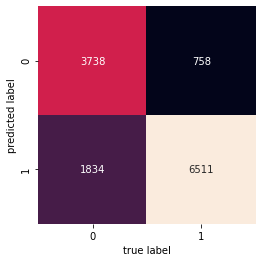

In [25]:
#Confustion Matrix heat map
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
#Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74      5572
           1       0.78      0.90      0.83      7269

    accuracy                           0.80     12841
   macro avg       0.81      0.78      0.79     12841
weighted avg       0.80      0.80      0.79     12841



In [27]:
li=[1,2,3]
li.pop(-1)

3